# **1. Introduction**

=================================================

    Objective : Proyek ini bertujuan untuk mengidentifikasi sentimen pengguna terhadap aplikasi TIX ID berdasarkan ulasan yang diberikan, dengan memanfaatkan teknik Natural Language Processing (NLP) menggunakan model Neural Network dan embedding untuk merepresentasikan teks ulasan ke dalam bentuk vektor numerik yang mencerminkan makna dan hubungan antar teks secara mendalam. Melalui analisis sentimen ini, diharapkan dapat memperoleh wawasan mengenai perasaan dan opini pengguna terkait fitur, kualitas layanan, serta pengalaman mereka dalam menggunakan aplikasi TIX ID. Hasil dari analisis ini akan memberikan informasi berharga bagi tim pengembangan untuk mengidentifikasi area yang memerlukan perbaikan dan menyusun strategi untuk meningkatkan pengalaman pengguna secara keseluruhan

=================================================


## **1.1. Background of the Problem**

Dengan kemajuan pesat dalam teknologi, berbagai inovasi di bidang digital kini semakin memudahkan kehidupan sehari-hari. Salah satunya adalah pemesanan tiket bioskop secara online. Menurut https://www.liputan6.com/feeds/read/5789953/cara-pesan-tiket-bioskop-online-panduan-lengkap-dan-praktis , metode pemesanan tiket bioskop online semakin diminati karena memberikan kemudahan dan fleksibilitas bagi konsumen tanpa harus menunggu di antrian loket. Salah satu contohnya adalah Tix ID, aplikasi pemesanan tiket bioskop online yang semakin populer di Indonesia. Aplikasi ini memungkinkan pengguna membeli tiket tanpa harus mengunjungi loket bioskop, memberikan kenyamanan serta kemudahan akses ke berbagai film terbaru. Pemesanan tiket dilakukan melalui platform digital seperti aplikasi smartphone atau situs web, yang memungkinkan pengguna memilih film, jadwal tayang, dan kursi yang diinginkan kapan saja dan di mana saja.

Meskipun aplikasi ini menawarkan kenyamanan, kritik atau umpan balik negatif tetap perlu diperhatikan untuk menjaga kualitas layanan. Analisis sentimen pada ulasan pengguna menggunakan Natural Language Processing (NLP) adalah salah satu cara untuk memahami pengalaman pengguna dengan aplikasi Tix ID. Dengan teknik NLP, Tix ID dapat menganalisis umpan balik pengguna untuk mengidentifikasi perasaan dan opini terkait layanan yang diberikan, serta menemukan area yang perlu perbaikan. Oleh karena itu, analisis sentimen dengan NLP sangat penting dalam memahami persepsi publik terhadap Tix ID dan terus meningkatkan pengalaman pengguna secara keseluruhan.

## **1.2. User**

**Tim Pengembangan Tix ID** : Proyek ini membantu tim Tix ID untuk memahami preferensi pengguna melalui analisis sentimen, sehingga mereka dapat meningkatkan fitur dan layanan serta merancang pembaruan yang lebih sesuai dengan kebutuhan dan keinginan pengguna. Hal ini bertujuan untuk membuat aplikasi menjadi lebih baik dan memuaskan bagi pengguna.

# **2. Import Libraries**

In [1]:
# Data Manipulation
import pandas as pd  
import numpy as np   

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns
from wordcloud import WordCloud

# Text Processing and NLP
import re                       
import nltk                     
import string     
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from imblearn.under_sampling import RandomUnderSampler


# Machine Learning and TensorFlow
import tensorflow as tf          
import tensorflow_hub as tf_hub  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Reshape, Embedding

# Scikit-learn Utilities
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder 

# Download necessary NLTK resources
nltk.download('stopwords')  
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **3. Data Loading**

Link Dataset : https://www.kaggle.com/code/devraai/tix-id-app-review-sentiment-and-eda#Sentiment-Analysis

                                     


## **3.1. Load Data**


In [2]:
# Membaca file CSV hasil SQL kemudian menampungnya ke dalam variabel df
df = pd.read_csv('Tix_ID_Dataset.csv')

# Tampilkan dat
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7286be06-c65c-44ad-b76a-05575bef0d01,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga bisa bayar coyyyy ,gmn ni",3,0,3.12.0,2024-12-12 04:25:11,"Hi TIX Hunter, terima kasih atas review Anda d...",2024-12-12 04:27:29,3.12.0
1,c4e3fbde-e8df-4f4c-a671-0d86ee3d6ebc,Peter Hariyanto,https://play-lh.googleusercontent.com/a-/ALV-U...,Tidak support lokasi bioskop selain daripada j...,1,0,NaN,2024-12-10 12:27:40,"Hi TIX Hunter, mohon maaf, fitur lokasi biosko...",2024-12-10 12:43:21,NaN
2,6d7635ff-8a4e-4c0b-87d3-a36d10061b1d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great apps!,5,0,3.12.0,2024-12-10 12:11:54,"Hi TIX Hunter, thank you for your review. Hope...",2024-12-10 12:43:48,3.12.0
3,9c7f8c01-c68b-4670-907a-cff94a5cc9bb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,0,3.7.0,2024-12-07 00:38:14,"Hi TIX Hunter, kami mohon maaf atas ketidaknya...",2024-12-07 02:27:10,3.7.0
4,1d51b7b8-4b5e-4bdf-aa70-5cf585445beb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu dan bekerja dengan baik.. keja...,5,0,3.12.0,2024-12-02 05:40:26,"Hi TIX Hunter, terima kasih atas review yang d...",2024-12-02 05:55:19,3.12.0
...,...,...,...,...,...,...,...,...,...,...,...
28242,9ad91e2b-6f0c-4204-a667-677f819c49bd,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Deposit saldonya ternyata juga bisa buat beli ...,5,0,0.2.0,2018-03-29 19:40:13,NaN,NaN,0.2.0
28243,e3ebea46-5037-4f36-9600-dab44a1a4d40,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Order tickets no antre pay with DANA. Love it,5,1,0.2.0,2018-03-29 18:45:01,NaN,NaN,0.2.0
28244,3c3e99f1-7be4-4623-b00e-726429c0bf79,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Sangat membantu, jadi g perlu ngantri tiket la...",5,1,NaN,2018-03-29 14:27:50,NaN,NaN,NaN
28245,9389e887-fac7-41f5-977f-5a81ad5fc7ae,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,cara cepat untuk book. buruan buat yg ios min,5,1,0.2.0,2018-03-29 13:30:46,NaN,NaN,0.2.0


## **3.2. Display Summary Data**



In [3]:
# Menampilkan info DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28247 entries, 0 to 28246
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              28247 non-null  object
 1   userName              28247 non-null  object
 2   userImage             28247 non-null  object
 3   content               28247 non-null  object
 4   score                 28247 non-null  int64 
 5   thumbsUpCount         28247 non-null  int64 
 6   reviewCreatedVersion  25884 non-null  object
 7   at                    28247 non-null  object
 8   replyContent          13340 non-null  object
 9   repliedAt             13340 non-null  object
 10  appVersion            25884 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.4+ MB


**Insight Dataset :**
- Dataset terdiri dari 28247 baris data yang indexnya dimulai dari 0 - 28246 dan terdiri dari 11 kolom
- Tidak terdapat missing value pada kolom reviewCreatedVersion, at, replyContent,repliedAt
- 2 kolom bertipe integer dan 9 kolom bertipe object
- Penggunaan memori sebesar 2.4+ MB

**Next Step :**
- Menghapus kolom yang tidak dibutuhkan untuk analisis.
- Menggunakan hanya kolom content yang berisi teks untuk analisis sentimen.
- Kolom score akan digunakan sebagai label untuk menentukan apakah teks masuk kategori positif atau negatif



In [4]:
# Mengecek nama-nama kolom
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

## **3.3. Drop the Unnecessary Columns**

In [5]:
# Menghapus kolom yang tidak dibutuhkan
df.drop(['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'], axis=1, inplace=True)

In [6]:
# Menampilkan 5 dataset terakhir 
df.tail()

,content,score
28242,Deposit saldonya ternyata juga bisa buat beli ...,5
28243,Order tickets no antre pay with DANA. Love it,5
28244,"Sangat membantu, jadi g perlu ngantri tiket la...",5
28245,cara cepat untuk book. buruan buat yg ios min,5
28246,"keren banget sih, jadi gampang kalo mau nonton 🤗",5


**Insight :**

Dari hasil di atas, dapat dilihat bahwa jumlah kolom dalam dataset yang awalnya sebanyak 11 kolom telah dikurangi menjadi 2 kolom utama yang dibutuhkan, yaitu:
- Kolom content – Berisi teks yang akan dianalisis untuk sentimen.
- Kolom score – Digunakan sebagai label untuk menentukan apakah teks termasuk ke dalam sentimen negatif, netral, atau positif. 

Kolom score dipilih sebagai penentu sentimen karena memberikan indikasi/penilaian yang jelas tentang emosi dalam konten, jika dilihat data diatas ketika seseorang memberikan sentimen yang positif cenderung orang tersebut memberikan score 5

In [7]:
# Mengubah nama kolom 
df.rename(columns={'content': 'text'}, inplace=True)

# Menamiplakn 5 data pertama
df.head()

,text,score
0,"Ga bisa bayar coyyyy ,gmn ni",3
1,Tidak support lokasi bioskop selain daripada j...,1
2,Great apps!,5
3,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1
4,sangat membantu dan bekerja dengan baik.. keja...,5


**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa kolom content berhasil di rename manjadi kolom score, hal ini dilakukan untuk memastikan konsistensi dengan standar analisis teks, serta mempermudah pemanggilan kolom pada tahap preprocessing dan training model.

## **3.4. Categorize Sentiments by Score**

Proses ini bertujuan untuk mengkategorikan sentimen dalam dataset berdasarkan nilai skor yang diberikan untuk memastikan model dapat membedakan opini dengan lebih jelas. Dengan membuat fungsi categorize_score maka kategori sentimen akan ditentukan berdasarkan nilai skor, di mana skor 1 dan 2 dianggap sebagai Negatif, skor 3 dianggap sebagai Netral, dan skor 4 serta 5 dianggap sebagai Positif. Hasil dari pengkategorian ini akan disimpan dalam kolom baru bernama 'sentiment'. Dengan cara ini, analisis sentimen menjadi lebih terstruktur dan mudah dipahami dimana :

- Sentimen negatif menunjukkan sebagian besar opini atau ulasa memiliki sentimen yang jelek menandakan adanya keluhan atau ketidakpuasan

- Sentimen netral menunjukkan opini yang cenderung netral atau tidak condong ke positif maupun negatif

- Sentimen negatif menunjukkan bahwa sebagian besar opni atau ulasan memiliki sentimen yang baik


In [8]:
# Mmebuat fungsi untuk mengkategorikan sentimen berdasarkan skor
def categorize_score(score):
    # Jika kor 1 dan 2 dianggap sebagai sentimen negatif
    if score in [1, 2]:
        return 'Negatif'
    # Jika skor 3 dianggap sebagai sentimen netral  
    elif score in [3]:
        return 'Netral' 
    # Jika skor 4 dan 5 dianggap sebagai sentimen positif 
    elif score in [4, 5]:
        return 'Positif'  

# Mmebuat kolom sentimen berda
df['sentiment'] = df['score'].apply(categorize_score)

# Menampilkan dataset
df

,text,score,sentiment
0,"Ga bisa bayar coyyyy ,gmn ni",3,Netral
1,Tidak support lokasi bioskop selain daripada j...,1,Negatif
2,Great apps!,5,Positif
3,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Negatif
4,sangat membantu dan bekerja dengan baik.. keja...,5,Positif
...,...,...,...
28242,Deposit saldonya ternyata juga bisa buat beli ...,5,Positif
28243,Order tickets no antre pay with DANA. Love it,5,Positif
28244,"Sangat membantu, jadi g perlu ngantri tiket la...",5,Positif
28245,cara cepat untuk book. buruan buat yg ios min,5,Positif


**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa kolom sentimen berhasil ditambahkan ke dalam dataset, berisi tiga kategori sentimen berdasarkan score, yaitu Negatif (score 1, 2), Netral (score 3), dan Positif (score 4, 5). 

In [9]:
# Menampilkan jumlah untuk tiap kategori
kategori_counts = df['sentiment'].value_counts()
print(kategori_counts)

sentiment
Positif    23575
Negatif     3930
Netral       742
Name: count, dtype: int64


**Insight :**

Berdasarkan hasil di atas, mayoritas sentimen adalah Positif (23.575), diikuti oleh Negatif (3.930) dan Netral (742). Hal ini menunjukkan bahwa lebih banyak opini atau ulasan bernada positif dibandingkan negatif atau netral. Namun, terdapat perbedaan yang cukup besar antara jumlah sentimen Positif dengan Negatif dan Netral. Untuk memperbaikinya, perlu dianalisis apakah sentimen Netral dapat digabungkan dengan Negatif, terutama karena sepengalaman saya dalam melihat ulasan di beberapa aplikasi, banyak pelanggan yang memberikan skor 3, tetapi isi ulasannya cenderung negatif.

In [10]:
# Menampilkan data yang kategorinya 'Netral'
df_netral = df[df['sentiment'] == 'Netral']

# Menampilkan hasil
df_netral.head(20)

,text,score,sentiment
0,"Ga bisa bayar coyyyy ,gmn ni",3,Netral
15,Sangat membantu dalam pemesanan tiket. Tapi fr...,3,Netral
27,Payment nya skrg cuma bisa e wallet banget nih...,3,Netral
37,Keep on having trouble getting into the app. K...,3,Netral
76,"keseringan update, tiap 6 bulan aja kek napa",3,Netral
78,Fitur TIX Food gak bisa pembayaran via kartu d...,3,Netral
88,Aplikasinya sih udah bagus ya. Sayang opsi pem...,3,Netral
167,It's easy but it rarely gives discount,3,Netral
181,Minusnya cuman bisa bayar via Dana,3,Netral
186,The admin fee is crazy tho.,3,Netral


**Insight :**

Berdasarkan hasil analisis, banyak ulasan dengan sentimen Netral sebenarnya lebih condong ke Negatif jika dilihat dari isinya. Oleh karena itu, sentimen Netral akan digabungkan ke dalam Negatif agar lebih mencerminkan opini sebenarnya dalam data. Selain itu, jumlah Netral hanya 742, jauh lebih kecil dibandingkan Positif (23.575) dan Negatif (3.930). Dengan jumlah yang relatif kecil, penggabungan Netral ke dalam Negatif akan memberikan analisis yang lebih representatif dan lebih bermakna

In [11]:
# Mengubah kategori 'Netral' menjadi 'Negatif'
df['sentiment'] = df['sentiment'].replace('Netral', 'Negatif')
df

,text,score,sentiment
0,"Ga bisa bayar coyyyy ,gmn ni",3,Negatif
1,Tidak support lokasi bioskop selain daripada j...,1,Negatif
2,Great apps!,5,Positif
3,Gak bsa byar pke shopeepay Pas klik gk bsa red...,1,Negatif
4,sangat membantu dan bekerja dengan baik.. keja...,5,Positif
...,...,...,...
28242,Deposit saldonya ternyata juga bisa buat beli ...,5,Positif
28243,Order tickets no antre pay with DANA. Love it,5,Positif
28244,"Sangat membantu, jadi g perlu ngantri tiket la...",5,Positif
28245,cara cepat untuk book. buruan buat yg ios min,5,Positif


**Insight :**

Berdasarkan hasil di atas, sentimen Netral berhasil diubah menjadi Negatif. Sebagai contoh, pada data dengan indeks ke-0, sentimen yang sebelumnya Netral telah dikategorikan ulang menjadi Negatif

In [12]:
# Menampilkan kembali jumlah untuk tiap kategori
kategori_counts = df['sentiment'].value_counts()
print(kategori_counts)

sentiment
Positif    23575
Negatif     4672
Name: count, dtype: int64


**Insight :**

Berdasarkan hasil akhir, sentimen Netral telah digabungkan dengan Negatif, sehingga kini terdapat 23.575 ulasan Positif dan 4.672 ulasan Negatif. Meskipun masih terdapat ketimpangan antara jumlah sentimen Positif dan Negatif, hasil ini sudah sesuai dengan analisis yang dilakukan dan lebih menggambarkan opini pelanggan secara lebih realistis.

In [13]:
# Menghapus kolom score
df.drop(['score'], axis=1, inplace=True)

df

,text,sentiment
0,"Ga bisa bayar coyyyy ,gmn ni",Negatif
1,Tidak support lokasi bioskop selain daripada j...,Negatif
2,Great apps!,Positif
3,Gak bsa byar pke shopeepay Pas klik gk bsa red...,Negatif
4,sangat membantu dan bekerja dengan baik.. keja...,Positif
...,...,...
28242,Deposit saldonya ternyata juga bisa buat beli ...,Positif
28243,Order tickets no antre pay with DANA. Love it,Positif
28244,"Sangat membantu, jadi g perlu ngantri tiket la...",Positif
28245,cara cepat untuk book. buruan buat yg ios min,Positif


**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa kolom score berhasil dihapus karena sudah tidak dibutuhkan lagi. Penghapusan ini dilakukan setelah skor berhasil dikonversi menjadi kategori sentimen (Positif dan Negatif), sehingga dataset menjadi lebih bersih dan fokus pada analisis sentimen

## **3.5. Check and Handle Duplicates Data**


Sebelum melanjutkan analisis, penting untuk memeriksa dan menangani data duplikat dalam dataset. Data duplikat dapat mengganggu hasil analisis dan memberikan gambaran yang tidak akurat dan akan mengurangi keberagaman opini dalam dataset. Dengan menghapus duplikat juga mempercepat pemrosesan data. Oleh karena itu, langkah ini bertujuan untuk memastikan bahwa setiap data dalam dataset adalah unik dan valid

In [14]:
# Mengecek data duplikat
print(f"Jumlah data yang duplikat :", df.duplicated().sum())

# Mengecek jumlah data setelah berhasil di remove
print(f"\nJumlah keseluruhan data : ",len(df))

# Menghapus data duplikat
df.drop_duplicates(inplace = True)

# Mengurutkan kembali index data setelah menangani data duplikat
df.reset_index(drop = True, inplace=True)

# Mengecek jumlah data setelah berhasil di remove
print(f"Jumlah data setelah diremove duplicate : ",len(df))


Jumlah data yang duplikat : 10110

Jumlah keseluruhan data :  28247
Jumlah data setelah diremove duplicate :  18137


**Insight :**

Berdasarkan hasil pengecekan, terdapat 10.110 data yang terindikasi sebagai data duplikat dari total 28.247 data. Setelah proses penghapusan data duplikat, jumlah data yang tersisa menjadi 18.137. Sekarang data kita bersih dari data yang redundan.

In [15]:
df.to_csv('data_sentimen_TIX_ID.csv', index=False)


## **3.6. Check Misssing Values**


In [16]:
# Mengecek jumlah nilai missing value pada masing-masing kolom
df.isnull().sum()

text         0
sentiment    0
dtype: int64

**Insight :**

Dengan menggunakan kode di atas, dapat dilihat bahwa tidak ada data yang missing values

# **4. Exploratory Data Analysis**

In [17]:
# Salin DataFrame asli untuk analisis data 
df_eda = df.copy()

## **4.1. Data Distribution by Sentiment Category**

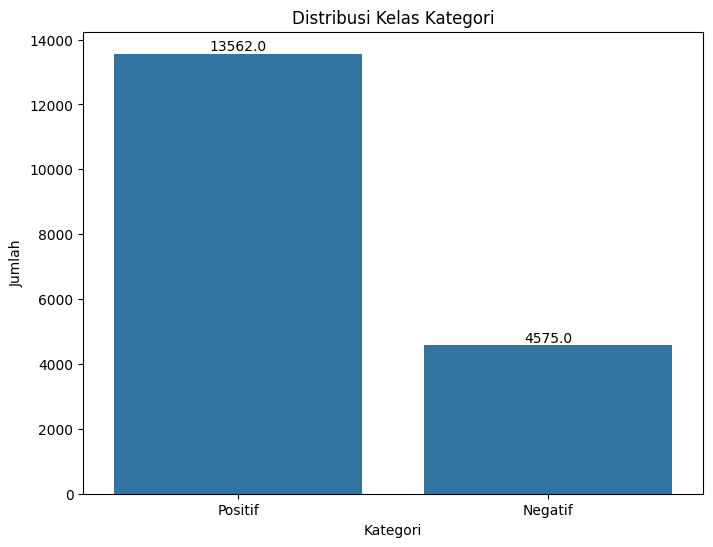

In [18]:
# Menghitung distribusi jumlah kategori 
sentimen_counts = df_eda['sentiment'].value_counts().reset_index()
sentimen_counts.columns = ['Kategori', 'Jumlah']

# Membuat bar plot menggunakan Seaborn
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(data=sentimen_counts, x='Kategori', y='Jumlah')

# Menambahkan nilai di atas setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom')

# Menambahkan judul
plt.title('Distribusi Kelas Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')

# Menampilkan bar plot
plt.show()



**Insight :**

Berdasarkan grafik di atas, menunjukkan bahwa sentimen Positif jauh lebih banyak, dengan 13.562 ulasan, dibandingkan dengan sentimen Negatif yang hanya 4.575 ulasan. Ketidakseimbangan ini bisa mempengaruhi kinerja model analisis sentimen, membuatnya lebih condong ke sentimen positif dan mengabaikan ulasan negatif yang penting dan perlu diperhatikan. Akibatnya, model mungkin tidak bisa mengenali pola dalam ulasan negatif dan memberikan wawasan yang kurang lengkap. Untuk mengatasi masalah ini, kami akan melakukan undersampling, yaitu menyamakan jumlah data positif dengan data negatif. Dengan langkah ini, diharapkan model dapat memberikan prediksi yang lebih adil dan akurat serta lebih memahami berbagai ulasan dalam data.





## **4.2. Percentage of Data Distribution by Sentiment Category**

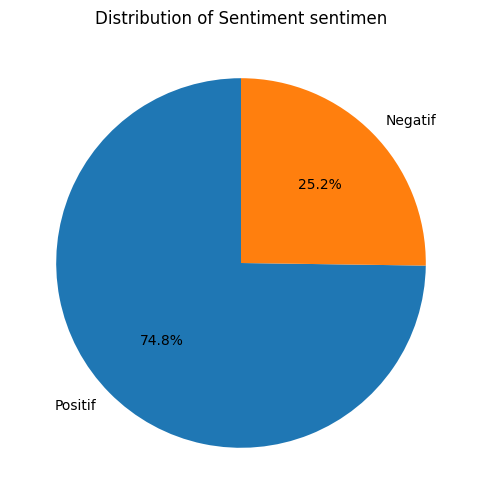

In [19]:
# Membuat pie chart distribusi gender
kategori_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(kategori_counts, labels=kategori_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment sentimen')
plt.show()

**Insight :**

Berdasarkan analisis diagram pie yang menggambarkan persentase total data, sebanyak 74,8% sentimen menunjukkan opini positif, sedangkan 25,2% merepresentasikan sentimen negatif.

## **4.3. Word Cloud by Sentiment Category based on Word Frequency**

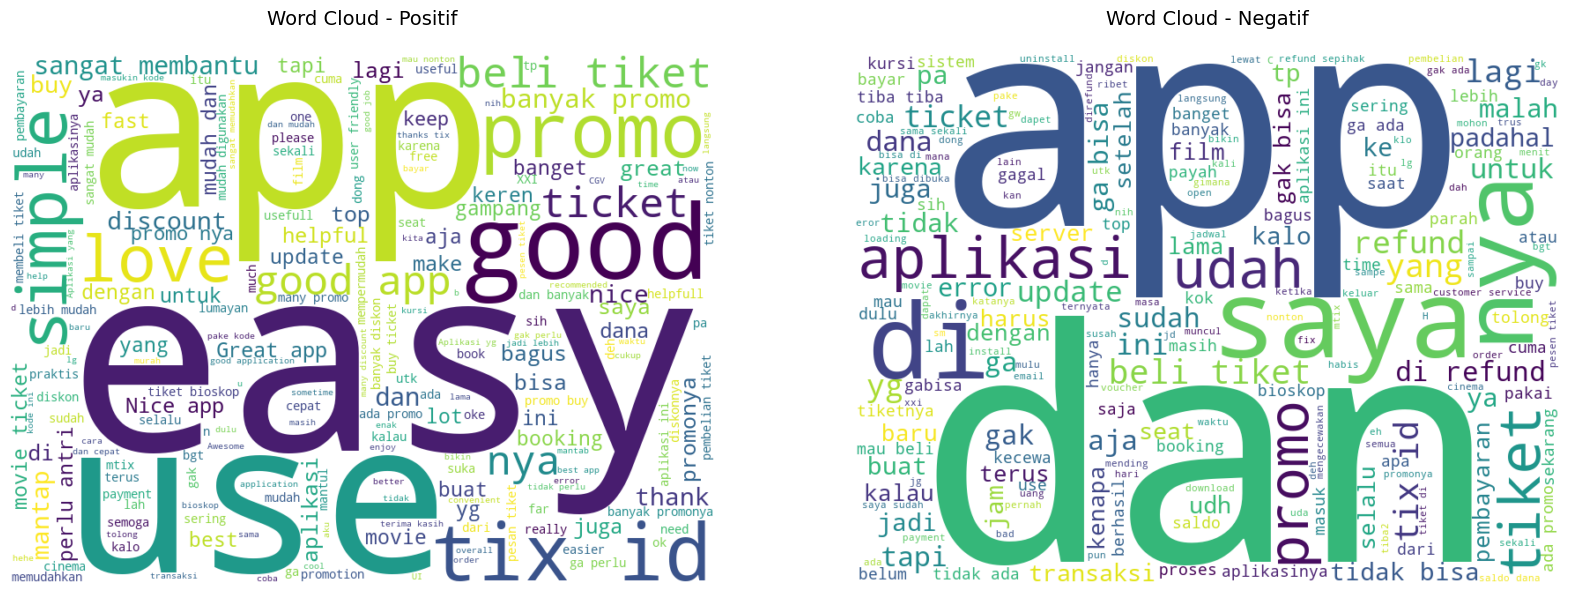

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Periksa apakah kolom sentiment dan text ada dalam dataset
if "sentiment" in df_eda.columns and "text" in df_eda.columns:
    # Pisahkan teks berdasarkan sentiment
    positif_text = " ".join(df_eda[df_eda["sentiment"] == "Positif"]["text"].dropna().astype(str))
    negatif_text = " ".join(df_eda[df_eda["sentiment"] == "Negatif"]["text"].dropna().astype(str))

# Buat Word Cloud di luar IF
wordcloud_positif = WordCloud(width=800, height=600, background_color='white').generate(positif_text) if positif_text else None
wordcloud_negatif = WordCloud(width=800, height=600, background_color='white').generate(negatif_text) if negatif_text else None

# Tampilkan Word Cloud
plt.figure(figsize=(20, 16))

# Word Cloud Positif
if wordcloud_positif:
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_positif, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud - Positif\n", fontsize=14)

# Word Cloud Negatif
if wordcloud_negatif:
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_negatif, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud - Negatif\n", fontsize=14)

plt.show()

**Insight :**

Berdasarkan hasil di atasa berikut merupakan temuan yang didapatkan :
- Kata-kata seperti tix_id', 'beli tiket', 'juga', 'app', 'tidak', 'dan', 'yang', 'ini', 'nya', 'untuk', 'promo' dan 'saya' sering muncul dalam berbagai konteks dan dokumen, baik positif maupun negatif. Karena sifatnya yang umum dan frekuensi kemunculan tinggi, kata-kata tersebut dianggap tidak terlalu bermakna dan tidak memberikan kontribusi yang signifikan terhadap hasil analisis.

- Sentimen Positif:
Pada sentimen posiitf pengguna banyak menggunakan kata-kata seperti 'easy', 'good', 'simple', 'banyak promo', 'nice', 'love', dsb. yang menunjukkan bahwa mereka sangat menghargai kemudahan penggunaan aplikasi, kenyamanan, dan promosi menarik yang ditawarkan. Istilah tersebut merupakan sentimen positif menyoroti kelebihan aplikasi yang mengindikasikan bahwa aplikasi ini memberikan pengalaman yang memuaskan, terutama dalam proses pembelian tiket dan layanan lainnya.

- Sentimen Negatif:
Pada sentimen negatif  kata-kata seperti 'tidak', 'gagal', 'ribet', 'payah', 'refund', 'server', 'lama', 'tidak bisa', dsb. mengungkapkan sejumlah keluhan. Pengguna merasa terganggu dengan masalah teknis, seperti gagal memesan, dan kesulitan dalam pengembalian dana, server yang lambat, dan proses yang memakan waktu lama. Selain itu, kata seperti 'error' dan 'update' menyoroti ketidakpuasan terkait pembaruan aplikasi yang dianggap mengganggu. Sentimen negatif ini menekankan perlunya perbaikan sistem, layanan dan efisiensi pada aplikasi.

# **5. Feature Engineering : Data Preprocessing**


In [21]:
# Salin DataFrame asli untuk feature engineering / data preprocessing
df_fe = df.copy()

## **5.1. Handling Data Imbalance**
Berdasarkan hasil data loading dan exploratory data analysis (EDA), dataset menunjukkan ketidakseimbangan dengan jumlah kelas Positif jauh lebih banyak dibandingkan Negatif. Oleh karena itu, pada tahap ini akan dilakukan penanganan untuk mengatasi data imbalance.

In [22]:
# Melihat jumlah data pada masing-masing kelas pada kolom sentiment
df_fe['sentiment'].value_counts()

sentiment
Positif    13562
Negatif     4575
Name: count, dtype: int64

**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa data imbalance/tidak seimbang dimana jumlah kelas Positif (13.562) jauh lebih banyak dibandingkan kelas Negatif (4.575), Jika hal ini tidak ditangani maka dapat menyebabkan model lebih bias terhadap kelas mayoritas. Untuk mengatasi hal ini akan digunakan teknik undersampling, yaitu mengurangi jumlah sampel kelas mayoritas (Positif) agar model dapat adil dan mempelajari pola kedua kelas secara lebih akurat. Undersampling dipilih dibandingkan oversampling karena lebih efisien secara komputasi dan mempercepat waktu pelatihan model. Selain itu, oversampling dengan metode seperti SMOTE berisiko menghasilkan data sintetis yang kurang mencerminkan pola asli.

In [23]:
# Mengonversi df_fe menjadi DataFrame
df_fe = pd.DataFrame(df_fe)

# Pisahkan fitur dan target
X = df_fe.drop(columns=['sentiment'])
y = df_fe['sentiment']

# Undersampling kelas 0 agar jumlahnya sama dengan kelas 1
undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # 1.0 berarti menyamakan jumlah kelas 0 dan 1
X_final, y_final = undersampler.fit_resample(X, y)

# Gabungkan hasilnya kembali ke dalam DataFrame
df_final = pd.DataFrame(X_final, columns=X.columns)
df_final['sentiment'] = y_final

print(df_final['sentiment'].value_counts())

sentiment
Negatif    4575
Positif    4575
Name: count, dtype: int64


**Insight :**

Setelah dilakukan penanganan data imbalance dengan teknik undersampling, dapat diliha bahwa jumlah data antara sentimen Positif dan Negatif kini balance/seimbang, yaitu 4.575 untuk masing-masing kategori. Dengan keseimbangan ini, model akan lebih adil dalam mengenali pola dari kedua sentimen

In [24]:
# Melihat Total data
len(df_final)

9150

**Insight :**

Setelah dilakukan penyesuaian, total keseluruhan data yang tersisa adalah 9.150

## **5.2. Define Stopword and Stemming**

### Identify words that have no Significant Meaning

Dalam analisis sentimen, terdapat kata-kata yang sering muncul di kedua kategori (positif dan negatif) tetapi tidak memiliki makna yang signifikan terhadap sentimen. Kata-kata ini umumnya bersifat umum atau netral dan dapat mengganggu akurasi model jika tidak disaring dengan baik.

Berikut merupakan kode untuk menampilkan kata-kata yang ditemukan dalam kedua kategori beserta frekuensi kemunculannya. Berdasarkan hasil analisis WordCloud dan exploratory data analysis (EDA), kata-kata ini dapat sebaiknya ditambahkan ke dalam daftar stopwords guna meningkatkan kualitas pemrosesan teks.

In [25]:
# Hitung frekuensi kata untuk masing-masing kategori
positif_words = positif_text.split()
negatif_words = negatif_text.split()

# Menghitung frekuensi kata menggunakan Counter
positif_word_count = Counter(positif_words)
negatif_word_count = Counter(negatif_words)

# Membuat DataFrame untuk 10 kata terpopuler - Positif
positif_df = pd.DataFrame(positif_word_count.most_common(), columns=["Kata_Positive", "Frekuensi_Positive"])

# Membuat DataFrame untuk  kata terpopuler - Negatif
negatif_df = pd.DataFrame(negatif_word_count.most_common(), columns=["Kata_Negative", "Frekuensi_Negative"])

# Menggabungkan kedua DataFrame berdasarkan indeks
combined_df = pd.concat([positif_df, negatif_df], axis=1)

In [26]:
positif_df

,Kata_Positive,Frekuensi_Positive
0,to,1687
1,and,1241
2,dan,1238
3,promo,1099
4,easy,1025
...,...,...
14719,Deposit,1
14720,pulsa,1
14721,Jadinya,1
14722,kependem,1


In [27]:
# Menggabungkan kedua DataFrame berdasarkan kata yang sama
merged_df = pd.merge(positif_df, negatif_df, left_on="Kata_Positive", right_on="Kata_Negative")

# Menampilkan DataFrame yang hanya berisi kata yang ada di kedua kategori
print("Kata yang ada di kedua kategori (positif dan negatif):")
merged_df.head(20)

Kata yang ada di kedua kategori (positif dan negatif):


,Kata_Positive,Frekuensi_Positive,Kata_Negative,Frekuensi_Negative
0,to,1687,to,421
1,and,1241,and,293
2,dan,1238,dan,621
3,promo,1099,promo,436
4,easy,1025,easy,8
5,tiket,990,tiket,970
6,app,880,app,323
7,the,828,the,617
8,good,774,good,36
9,banyak,653,banyak,104


**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa beberapa kata muncul dalam kedua kategori dengan frekuensi yang cukup besar, kata umum seperti "to", "and", "dan", "the", "di", dan "nya", yang tidak memiliki makna sentimen yang kuat dan sebaiknya dimasukkan ke dalam daftar stopwords agar tidak mengganggu model analisis. Selain itu, kata spesifik seperti "tiket", "app", "banyak" dan "bisa" juga memiliki makna yang bergantung pada kalimatnya, misalnya "banyak pilihan tiket tersedia" (positif) dan "banyak keluhan tentang aplikasi" (negatif), sehingga penting untuk mempertimbangkan konteks penggunaannya dalam analisis sentimen

In [28]:
# Stopwords untuk Bahasa Indonesia
stpwds_id = list(set(stopwords.words('indonesian')))

# Kata yang di tambahkan ke dalam daftar stopword
stpwds_id.extend(['to', 'and', 'dan', 'the', 'banyak','for', 'bisa', 'di', 'nya'])

# Define Stemming
stemmer = StemmerFactory().create_stemmer()

In [29]:
len(stpwds_id)

766

**Insight :**

Jumlah kata yang ada di dalam stopword berjumlah 766 kata

## **5.3. Text Preprocessing**

Sebelum melakukan modeling , tahapan preprocessing teks adalah langkah penting dalam analisis data untuk meningkatkan kualitas. hal ini mencakup pengubahan teks menjadi huruf kecil, penghapusan hashtag, karakter non-huruf, URL, angka, dan spasi berlebih. Teks kemudian di tokenisasi, stopwords dihapus, kata-kata distem ke bentuk dasarnya, dll. untuk memastikan data bersih sehingga siap dianalisis lebih lanjut.

In [30]:
# Memebuat fungsi untuk teks preprocessing

def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Mention removal
  text = re.sub("@[A-Za-z0-9_]+", " ", text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)
  
  # anydigit removal (\d)
  text = re.sub(r"\\d", " ",text)

  # Whitespace removal
  text = text.strip()

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_id]

  # Stemming
  tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

In [31]:
# Applying Text Preprocessing to the Dataset
df_final['text_processed'] = df_final['text'].apply(lambda x: text_preprocessing(x))
df_final

,text,sentiment,text_processed
0,"Ga bisa bayar coyyyy ,gmn ni",Negatif,ga bayar coyyyy gmn ni
1,Tidak support lokasi bioskop selain daripada j...,Negatif,support lokasi bioskop jakarta
3,Gak bsa byar pke shopeepay Pas klik gk bsa red...,Negatif,gak bsa byar pke shopeepay pas klik gk bsa red...
10,Jangan kirim² notif ganggu woyyyy,Negatif,kirim notif ganggu woyyyy
11,terlalu banyak notif rekomendasi film dalam se...,Negatif,notif rekomendasi film hari
...,...,...,...
12435,top promonya,Positif,top promonya
8375,bagus gilaaa,Positif,bagus gilaaa
17768,Ini app gacor banget rekomen banget dah,Positif,app gacor banget rekomen banget dah
2685,Saya selalu membeli tiket xxi disini. Mudah da...,Positif,beli tiket xxi mudah byk diskon sukses tix id


**Insight :**

Hasil preprocessing teks di atas menunjukkan bahwa data ulasan pengguna telah dibersihkan. Contohnya, elemen yang tidak relevan seperti tanda baca. Kemudian semua huruf diubah menjadi kecil, dan kata-kata yang tidak penting dihapus, sehingga hanya kata-kata penting yang tersisa. Biarpun masih terdapat beberapa kata yang tidak relevan seperti 'ga', 'dah', 'gk', dll tetapi proses ini membuat teks menjadi sedikit lebih bersih.

## **5.2. Target Conversion**

In [32]:
# Melihat nilai unik pada kolom sentiment
df_final.sentiment.unique()

array(['Negatif', 'Positif'], dtype=object)

In [33]:
# Membuat kolom baru bernama label untuk mengonversi sentimen menjadi angka
df_final['label'] = df_final['sentiment'].replace({'Negatif' : 0, 'Positif' : 1})
df_final

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10784\385451170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['label'] = df_final['sentiment'].replace({'Negatif' : 0, 'Positif' : 1})


,text,sentiment,text_processed,label
0,"Ga bisa bayar coyyyy ,gmn ni",Negatif,ga bayar coyyyy gmn ni,0
1,Tidak support lokasi bioskop selain daripada j...,Negatif,support lokasi bioskop jakarta,0
3,Gak bsa byar pke shopeepay Pas klik gk bsa red...,Negatif,gak bsa byar pke shopeepay pas klik gk bsa red...,0
10,Jangan kirim² notif ganggu woyyyy,Negatif,kirim notif ganggu woyyyy,0
11,terlalu banyak notif rekomendasi film dalam se...,Negatif,notif rekomendasi film hari,0
...,...,...,...,...
12435,top promonya,Positif,top promonya,1
8375,bagus gilaaa,Positif,bagus gilaaa,1
17768,Ini app gacor banget rekomen banget dah,Positif,app gacor banget rekomen banget dah,1
2685,Saya selalu membeli tiket xxi disini. Mudah da...,Positif,beli tiket xxi mudah byk diskon sukses tix id,1


**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa kolom 'label' berhasil ditambahkan ke dalam df_final, di mana isinya adalah kategori sentimen yang telah dikonversi menjadi angka

## **5.2. Split between Train-set, Val-set and Test-set**


In [34]:
# Melakukan pemisahan data
X_train_val, X_test, y_train_val, y_test = train_test_split(
    df_final.text_processed,
    df_final.label,
    test_size=0.15, # 15% data untuk test
    random_state=20,  
    stratify=df_final.label # Mempertahankan proporsi kelas
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.10, # 10% dari data train untuk validasi
    random_state=20,  
    stratify=y_train_val # Mempertahankan proporsi kelas
)

# Menampilkan ukuran dataset
print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)


Train Size :  (6999,)
Val Size   :  (778,)
Test Size  :  (1373,)


**Insight :**

Data telah berhasil dibagi menjadi tiga subset, ukuran data pelatihan (train size) terdiri dari 6.999 sampel, ukuran data validasi (val size) terdiri dari 778 sampel, dan ukuran data pengujian (test size) terdiri dari 1.373 sampel

In [35]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Ubah ke label encoding
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Menampilkan hasil label encoding
print('Encoded y_train:', y_train)
print('Encoded y_val:', y_val)
print('Encoded y_test:', y_test)

Encoded y_train: [0 0 1 ... 1 0 1]
Encoded y_val: [1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0
 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0
 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0

**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa y_train, y_val, dan y_test berhasil diubah menjadi angka. Proses encoding label menggunakan LabelEncoder menghasilkan nilai 0 dan 1, yang mewakili kategori 'negatif' dan 'positif'. Berhubung karena model yang digunakan adalah model Neural Network, representasi ini sangat penting karena model memerlukan input dalam bentuk numerik untuk melakukan perhitungan. Dengan menggunakan encoding ini, Neural Network dapat belajar dari data dengan lebih efisien, mengenali pola dalam input, dan membuat prediksi yang akurat

# **6. ANN Training (Sequential API)**

## **Model Building**

Selanjutnya, sebelum melakukan embedding, teks harus diubah terlebih dahulu menjadi angka agar dapat dipahami oleh model. Teknik yang digunakan untuk mengubah teks menjadi angka adalah TextVectorization. Dalam TensorFlow Keras, TextVectorization mengonversi teks ke token numerik, merapikan teks, dan membatasi panjangnya sesuai kebutuhan model. Dengan hanya menggunakan data yang tersedia, model dapat belajar pola spesifik dari ulasan pengguna tanpa bergantung pada embedding eksternal yang mungkin tidak sepenuhnya relevan. Pendekatan ini juga memungkinkan model LSTM memahami pola teks dengan lebih baik tanpa harus menggunakan embedding eksternal seperti Word2Vec atau FastText, yang dapat memakan memori lebih dari 500 MB. Bahkan, jika menggunakan hub layer dari TensorFlow Hub, penggunaan memori bisa mencapai 5 GB, menjadikannya solusi yang kurang efisien dibandingkan TextVectorization.

### **A. Text Vectorization**

In [36]:
# Get Vocabularies
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

**Insight :**

Kode diatas bertujuan untuk mengubah teks menjadi angka dengan CountVectorizer. Kemudian data train diproses dengan fit_transform, lalu data train dengan transform agar sesuai dengan pola yang sudah dipelajari.

In [37]:
# Finding the Number of Vocabs and Max Token Length in One Document
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  6036
Maximum Sentence Length :  134 tokens


**Insight :**

Berdasarkan hasil di atas , dapat dilihat bahwa dataset memiliki 6036 kata unik, hal ini mencerminkan bahwa kosakata dalam ulasan sangat beragam dengan panjang kalimat maksimal 134 token(kata)

In [38]:
# Text Vectorization
from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,))

# Melatih layer TextVectorization berdasarkan data latih (X_train)
text_vectorization.adapt(X_train)

In [39]:
# Example Result

## Document example
print('Document example\n')
print(df_final.text_processed[10])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([df_final.text_processed[10]]))
print('Vector size : ', text_vectorization([df_final.text_processed[0]]).shape)


Document example

kirim notif ganggu woyyyy

Result of Text Vectorization
tf.Tensor(
[[ 337  398  506 2898    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]], shape=(1, 134), dtype=int64)
Vector size :  (1, 134)


**Insight :**

Dari hasil di atas, dapat dilihat bahwa dengan Text Vectorization, kalimat indeks ke 10 "kirim notif ganggu woyyyy" diubah menjadi representasi numerik dalam bentuk tensor berukuran (1, 134). Jika diperhatikan, hanya indeks 0 sampai 3 yang terisi, karena panjang token dari kalimat tersebut hanya 4 kemudiann penggunaan angka nol dalam tensor menandakan bahwa kalimat pada indeks ke 10 lebih pendek dari panjang maksimal yang ditentukan Hal ini menunjukkan bahwa teks telah berhasil dikonversi menjadi format yang dapat diproses oleh model machine learning. 

In [40]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)
text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'tiket',
 'promo',
 'aplikasi',
 'beli',
 'app',
 'ga',
 'refund',
 'i',
 'tix',
 'dana',
 'gak',
 'it',
 'id',
 'yg',
 'good',
 'mudah',
 'easy',
 'bayar']

**Insight :**

Hasil di atas merupakan 20 token teratas yang terurut berdasarkan frekuensi kemunculan dalam dataset berdasarkan hasil Text Vectorization

### **B. Word Embedding**

In [41]:
# Embedding / memudahkan model untuk training
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

**Insight :**

Dengan penggunaan layer embedding di atas memungkinkan model untuk belajar representasi kata yang lebih efektif kemdian mengurangi kompleksitas data dan mempercepat proses pelatihan.

In [42]:
# Example Result

## Document example
print('Document example')
print(df_final.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df_final.text_processed[0]]))
print('Vector size : ', text_vectorization([df_final.text_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df_final.text_processed[0]])))
print('Vector size : ', embedding(text_vectorization([df_final.text_processed[0]])).shape)

Document example
ga bayar coyyyy gmn ni

Result of  Text Vectorization
tf.Tensor(
[[   7   19 5526  524  424    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]], shape=(1, 134), dtype=int64)
Vector size :  (1, 134)

Result of  Embedding
tf.Tensor(
[[[ 0.01481745 -0.01257395  0.04811081 ...  0.02460161  0.00059637
    0.02693671]
  [ 0.03152473  0.0219663  -0.04910914 ...  0.0069508   

**Insight :**

Setelah proses Text Vectorization, contoh kalimat indeks ke 0 "ga bayar coyyyy gmn ni" diubah menjadi tensor dengan ukuran (1, 134), di mana hanya indeks 0 hingga 4 terisi dengan nilai yang sesuai, sementara sisanya adalah nol. Ini menunjukkan bahwa kalimat tersebut lebih pendek dari panjang maksimal yang diizinkan yaitu 134. Selanjutnya, setelah melalui layer Embedding, tensor ini diperluas menjadi (1, 231, 128), di mana setiap token kini direpresentasikan sebagai vektor berdimensi 128. Proses ini memudahkan model untuk memahami makna kata dalam kontek serta hubungan antar kata.


## **6.1. Model Definition**

Model yang dipilih untuk analisis sentimen ulasan aplikasi tiket online TIX ID adalah **Neural Network** karena kemampuannya dalam memahami pola kompleks dalam data teks. Model ini efektif dalam mengolah data besar dan memberikan hasil akurat dalam mengklasifikasikan sentimen pengguna. **Sequential API** digunakan karena menawarkan struktur yang lebih sederhana dan intuitif, memudahkan dalam membangun serta mengubah arsitektur model sesuai kebutuhan.

Pada tahap pelatihan ANN, sesuai dengan model building, model Neural Network akan dibangun menggunakan TextVectorization untuk mengonversi teks menjadi representasi numerik.


***Arsitektur Model:***
- **TextVectorization Layer:** Layer yang berfungsi untuk mengonversi teks mentah menjadi representasi numerik
- **Dense Layers:** Terdapat dua Dense layers yaitu 32 dan 16 neuron, masing-masing menggunakan fungsi aktivasi ReLU 
- **Output Layer:** Menggunakan satu neuron dengan fungsi aktivasi sigmoid yang digunakan untuk klasifikasi biner

***Hyperparameter:***
- **Epochs:** Model dilatih selama 50 epochs
- **Loss Function:** Menggunakan 'binary_crossentropy', yang umum digunakan untuk masalah klasifikasi biner
- **Optimizer:** Adam dipilih sebagai optimizer karena kemampuannya untuk mengadaptasi learning rate secara otomatis, kemudian membantu dalam konvergensi lebih cepat dan stabil selama pelatihan.

***Metrics:*** Menggunakan akurasi sebagai metrik evaluasi yang memberikan indikasi seberapa banyak prediksi model yang benar


## **6.2. Model Training**

In [142]:
# Atur seed
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Definisikan arsitektur model
model_lstm = Sequential()
model_lstm.add(text_vectorization)
model_lstm.add(embedding)
model_lstm.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm.add(Dropout(0.1))
model_lstm.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile model dengan loss function binary_crossentropy dan optimizer adam
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

# Melatih model dengan data pelatihan dan validasi
model_lstm_hist = model_lstm.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
219/219 [==============================] - 30s 100ms/step - loss: 0.2090 - accuracy: 0.9318 - val_loss: 0.3529 - val_accuracy: 0.8817
Epoch 2/50
219/219 [==============================] - 20s 93ms/step - loss: 0.0888 - accuracy: 0.9753 - val_loss: 0.4185 - val_accuracy: 0.8715
Epoch 3/50
219/219 [==============================] - 21s 97ms/step - loss: 0.0633 - accuracy: 0.9819 - val_loss: 0.4634 - val_accuracy: 0.8689
Epoch 4/50
219/219 [==============================] - 22s 100ms/step - loss: 0.0504 - accuracy: 0.9827 - val_loss: 0.5350 - val_accuracy: 0.8766
Epoch 5/50
219/219 [==============================] - 21s 96ms/step - loss: 0.0462 - accuracy: 0.9831 - val_loss: 0.5246 - val_accuracy: 0.8560
Epoch 6/50
219/219 [==============================] - 19s 89ms/step - loss: 0.0506 - accuracy: 0.9790 - val_loss: 0.5616 - val_accuracy: 0.8650
Epoch 7/50
219/219 [==============================] - 22s 101ms/step - loss: 0.0383 - accuracy: 0.9856 - val_loss: 0.6286 - val_accura

**Insight :**

Berdasarkan hasil pelatihan model di atas, terlihat bahwa loss pada data pelatihan sebesar 1.87% dengan akurasi 99.10%, yang menunjukkan bahwa model belajar dengan sangat baik pada data latih. Namun, ketika diuji dengan data validasi, loss meningkat menjadi 113.78% dan akurasi menurun menjadi 85.35%.Ini menunjukkan bahwa model overfitting di mana model bekerja dengan baik pada saat pelatihan tetapi tidak bekerja dengan baik pada saat pengujian sehingga tidak mampu mengeneralisasi data baru.

## **6.3. Model Evaluation**

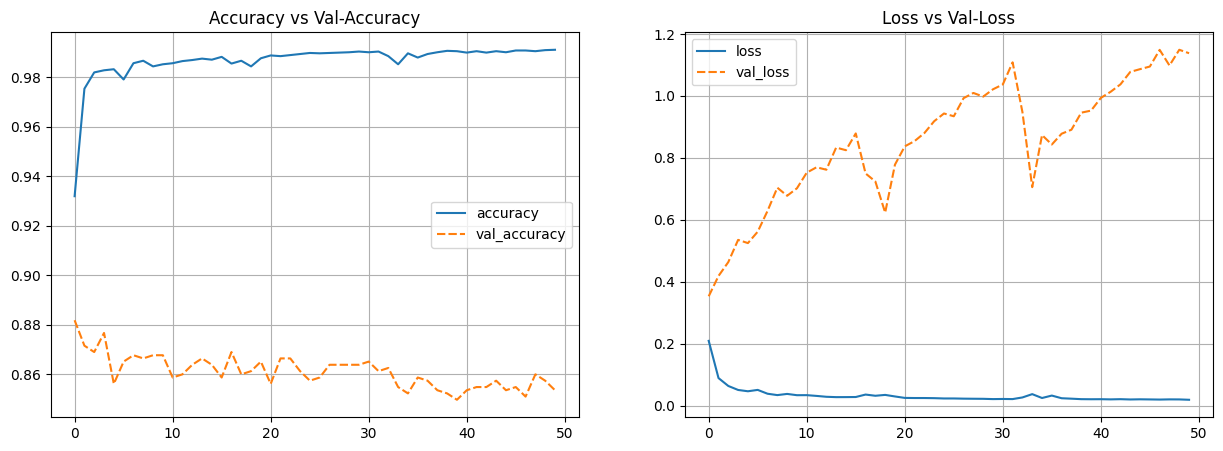

In [143]:
# Plot Training Results
model_lstm_hist_df = pd.DataFrame(model_lstm_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

**Insight :**

Grafik di atas menunjukkan terjadinya overfitting, di mana akurasi pelatihan hampir mencapai 100%, sementara akurasi validasi stagnan di kisaran 86%-88%. Selain itu, nilai loss pada pelatihan cenderung stabil dan rendah, sementara val_loss terus meningkat secara fluktuatif. Hal ini menunjukkan bahwa model terlalu banyak belajar pada data pelatihan, tetapi gagal mengeneralisasi data validasi.

43/43 [==============================] - 3s 27ms/step
Akurasi Model pada Data Test: 0.8660


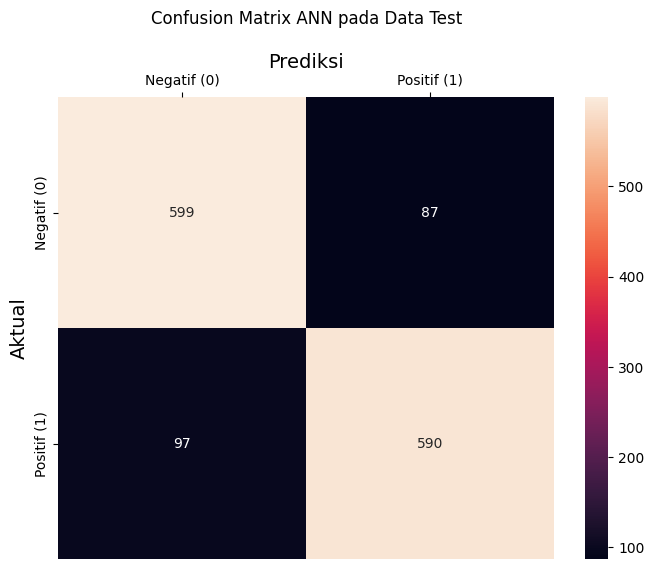

In [167]:
# Prediksi pada data test
y_pred = model_lstm.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Akurasi Model pada Data Test: {accuracy:.4f}')

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, fmt='d', annot=True,  ax=ax)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediksi', fontsize=14)
ax.set_xticklabels(['Negatif (0)', 'Positif (1)'])
ax.set_ylabel('Aktual', fontsize=14)
ax.set_yticklabels(['Negatif (0)', 'Positif (1)'])
plt.title('Confusion Matrix ANN pada Data Test\n')
plt.show()


**insight :**

Berdasarkan hasil confusion matrix, model ini mencapai akurasi sebesar 86.60%. Dari total prediksi, model berhasil mengidentifikasi 599 data sebagai True Negatives (prediksi negatif yang benar) dan 590 data sebagai True Positives (prediksi positif yang benar). Namun, model masih menghasilkan 97 False Positives (prediksi positif yang salah) dan 87 False Negatives (prediksi negatif yang salah). Model menunjukkan kemampuan yang cukup baik dalam membedakan kelas positif dan negatif, meskipun masih terdapat beberapa kesalahan pada prediksi positif dan negatif

***Kesimpulan Model ANN PreTrained***

Berdasarkan hasil evaluasi model, terlihat bahwa meskipun model memiliki akurasi tinggi pada data pelatihan, terjadi overfitting yang signifikan saat diuji dengan data validasi. Hal ini terlihat dari perbedaan yang mencolok antara training accuracy dan validation accuracy, serta peningkatan validation loss yang menunjukkan bahwa model kurang mampu menggeneralisasi data baru. Selain itu, meskipun performa model dalam membedakan kelas positif dan negatif cukup baik, masih terdapat kesalahan prediksi yang perlu diminimalkan. Oleh karena itu, langkah selanjutnya yaitu melakukan model improvement dengan teknik seperti regularisasi, dropout, early stopping, serta eksplorasi arsitektur model yang lebih optimal agar model dapat memiliki performa yang lebih stabil dan mampu beradaptasi dengan data dunia nyata.



# **7. ANN Improvement (Sequential API)**

## **7.1. Model Definition**

Pada tahap ini, akan dilakukan dua model improvement menggunakan Long Short-Term Memory (LSTM) dengan Transfer Learning NNLM yang diimpor dari 'https://www.kaggle.com/models/google/nnlm/tensorFlow2/tf2-preview-id-dim128-with-normalization/1' untuk meningkatkan performa klasifikasi. LSTM dipilih karena kemampuannya dalam menangani urutan kata dan konteks dalam kalimat, sementara transfer learning digunakan untuk memanfaatkan fitur yang telah dipelajari sebelumnya guna mempercepat pelatihan dan meningkatkan generalisasi model.

- Model pertama menggunakan Bidirectional LSTM dengan GlorotUniform Initializer, sama seperti model sebelumnya. GlorotUniform membantu mendistribusikan bobot secara seimbang sejak awal pelatihan, mempercepat konvergensi, dan mengurangi risiko vanishing/exploding gradient. Model ini juga dilengkapi Dropout Layer untuk mengurangi overfitting serta Dense Layer dengan aktivasi sigmoid untuk klasifikasi biner.

- Model kedua menerapkan Bidirectional LSTM dengan Orthogonal Initializer untuk meningkatkan stabilitas dan kinerja model. Orthogonal Initializer memastikan bobot tetap ortogonal selama propagasi, membantu mengurangi vanishing/exploding gradient, serta mempertahankan magnitudo gradien lebih stabil dalam menangani dependensi jangka panjang pada data teks. Dengan pendekatan ini, model diharapkan lebih stabil selama pelatihan dan lebih cepat mencapai konvergensi.

Model improvement ini bertujuan untuk mengatasi masalah overfitting pada model sebelumnya. Dengan menggunakna transfer learning diharapkan model dapat memberikan prediksi lebih baik dan akurat serta mencapai kestabilan pada data validasi maupun data baru.

## **7.2. Model Training**

In [44]:
# URL model transfer learning dari Kaggle
url = 'https://www.kaggle.com/models/google/nnlm/tensorFlow2/tf2-preview-id-dim128-with-normalization/1'

# Membuat lapisan 
hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

### **7.2.1. Model Improvement 1**

In [146]:
# Atur seed
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Definisikan arsitektur model
model_lstm_tf = Sequential([
    hub_layer,
    Reshape((128, 1)),  
    Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))),
    Dropout(0.1),
    Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

# Compile model dengan loss function binary_crossentropy dan optimizer adam
model_lstm_tf.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

# Melatih model dengan data pelatihan dan validasi
model_lstm_tf_hist = model_lstm_tf.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
219/219 [==============================] - 28s 86ms/step - loss: 0.6157 - accuracy: 0.6681 - val_loss: 0.5784 - val_accuracy: 0.7095
Epoch 2/50
219/219 [==============================] - 16s 72ms/step - loss: 0.5735 - accuracy: 0.7128 - val_loss: 0.5652 - val_accuracy: 0.7147
Epoch 3/50
219/219 [==============================] - 15s 70ms/step - loss: 0.5695 - accuracy: 0.7132 - val_loss: 0.5631 - val_accuracy: 0.7185
Epoch 4/50
219/219 [==============================] - 15s 69ms/step - loss: 0.5666 - accuracy: 0.7127 - val_loss: 0.5561 - val_accuracy: 0.7301
Epoch 5/50
219/219 [==============================] - 15s 71ms/step - loss: 0.5619 - accuracy: 0.7171 - val_loss: 0.5547 - val_accuracy: 0.7224
Epoch 6/50
219/219 [==============================] - 15s 67ms/step - loss: 0.5611 - accuracy: 0.7200 - val_loss: 0.5505 - val_accuracy: 0.7198
Epoch 7/50
219/219 [==============================] - 15s 70ms/step - loss: 0.5597 - accuracy: 0.7237 - val_loss: 0.5442 - val_accuracy:

**Insight :**

Berdasarkan hasil pelatihan model di atas, nilai loss pada data pelatihan adalah 0.4564 dengan akurasi 78.80%, yang menunjukkan bahwa model mampu mengenali pola dalam data pelatihan dengan cukup baik. Namun, saat diuji dengan data validasi, nilai loss meningkat menjadi 0.4977 dan akurasi turun menjadi 77.76%, yang mengindikasikan adanya potensi overfitting. Meskipun perbedaannya tidak terlalu signifikan, hal ini tetap menunjukkan bahwa model mengalami kesulitan dalam melakukan generalisasi terhadap data baru

### **7.2.2. Model Improvement 2**

In [46]:
# Atur seed untuk hasil yang konsisten
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Definisikan arsitektur model dengan Orthogonal initializer
model_lstm_tf_1 = Sequential([
    hub_layer,
    Reshape((128, 1)),  
    Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.Orthogonal(seed))),
    Dropout(0.1),
    Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.Orthogonal(seed))),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

# Compile model dengan loss function binary_crossentropy dan optimizer adam
model_lstm_tf_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model dengan data pelatihan dan validasi
model_lstm_tf_1_hist = model_lstm_tf_1.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
219/219 [==============================] - 22s 68ms/step - loss: 0.6221 - accuracy: 0.6531 - val_loss: 0.5951 - val_accuracy: 0.6864
Epoch 2/50
219/219 [==============================] - 13s 61ms/step - loss: 0.5656 - accuracy: 0.7152 - val_loss: 0.5509 - val_accuracy: 0.7262
Epoch 3/50
219/219 [==============================] - 13s 60ms/step - loss: 0.5469 - accuracy: 0.7318 - val_loss: 0.5350 - val_accuracy: 0.7404
Epoch 4/50
219/219 [==============================] - 13s 59ms/step - loss: 0.5383 - accuracy: 0.7324 - val_loss: 0.5445 - val_accuracy: 0.7378
Epoch 5/50
219/219 [==============================] - 13s 61ms/step - loss: 0.5352 - accuracy: 0.7347 - val_loss: 0.5457 - val_accuracy: 0.7249
Epoch 6/50
219/219 [==============================] - 13s 60ms/step - loss: 0.5312 - accuracy: 0.7391 - val_loss: 0.5255 - val_accuracy: 0.7494
Epoch 7/50
219/219 [==============================] - 13s 60ms/step - loss: 0.5218 - accuracy: 0.7440 - val_loss: 0.5192 - val_accuracy:

**Insight :**

Berdasarkan hasil pelatihan model di atas, nilai loss pada data pelatihan adalah 0.4029 dengan akurasi 81.98%, yang menunjukkan bahwa model telah belajar dengan baik. Saat diuji dengan data validasi, nilai loss meningkat menjadi 0.4587 dan akurasi turun menjadi 78.92%. Perbedaan ini menunjukkan adanya sedikit kesenjangan antara performa model pada data pelatihan dan validasi, tetapi masih dalam batas yang wajar. Model masih mampu melakukan generalisasi dengan cukup baik, meskipun ada ruang untuk peningkatan lebih lanjut.

## **7.3. Model Evaluation**

### **7.3.1. Evaluation Model Improvement 1**

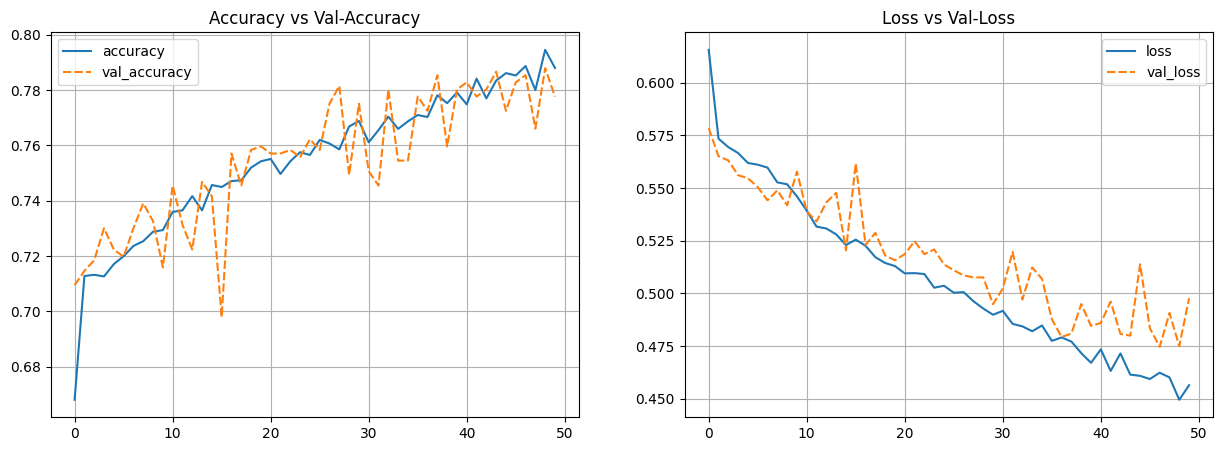

In [154]:
# Plot Training Results

model_lstm_tf_hist_df = pd.DataFrame(model_lstm_tf_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_tf_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_tf_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

**Insight :**

Grafik di atas menunjukkan peningkatan yang cukup baik dibandingkan sebelumnya. Akurasi pelatihan terus meningkat secara konsisten, sementara akurasi validasi berada di kisaran 78%-79%, dengan perbedaan yang relatif kecil, menunjukkan model sudah lebih stabil. Nilai loss pada pelatihan juga menurun secara signifikan, meskipun loss validasi masih berfluktuasi. Secara keseluruhan, model ini sudah menunjukkan performa yang lebih baik dari model pre-trained, tetapi tetap ada ruang untuk perbaikan agar generalisasinya terhadap data baru semakin optimal.

43/43 [==============================] - 1s 32ms/step
Akurasi Model pada Data Test: 0.7400


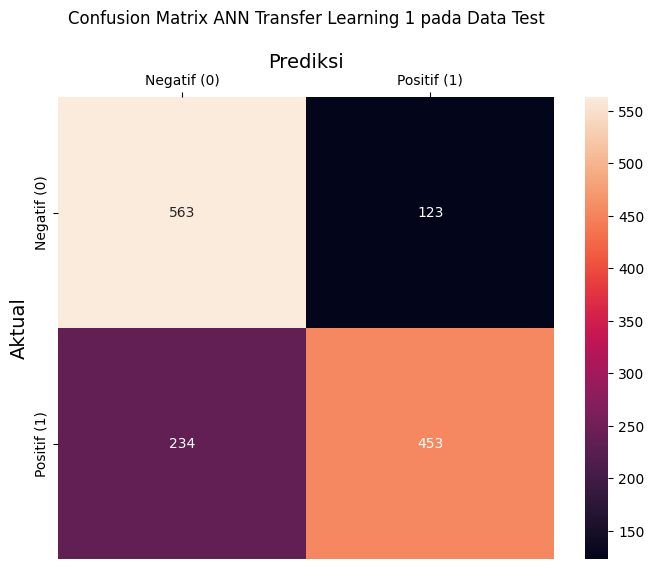

In [168]:
# Prediksi pada data test
y_pred = model_lstm_tf.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Akurasi Model pada Data Test: {accuracy:.4f}')

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, fmt='d', annot=True,  ax=ax)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediksi', fontsize=14)
ax.set_xticklabels(['Negatif (0)', 'Positif (1)'])
ax.set_ylabel('Aktual', fontsize=14)
ax.set_yticklabels(['Negatif (0)', 'Positif (1)'])
plt.title('Confusion Matrix ANN Transfer Learning 1 pada Data Test\n')
plt.show()


**Insight :**

Pada hasil diatas akurasi model improvement 1 adalah 74.00%. Berdasarkan hasil confusion matrix, model berhasil memprediksi 563 data sebagai True Negatives dan 453 data sebagai True Positives. Namun, model masih menghasilkan kesalahan yang terdiri dari 123 False Positives dan 234 False Negatives

### **7.3.2. Evaluation Model Improvement 2**

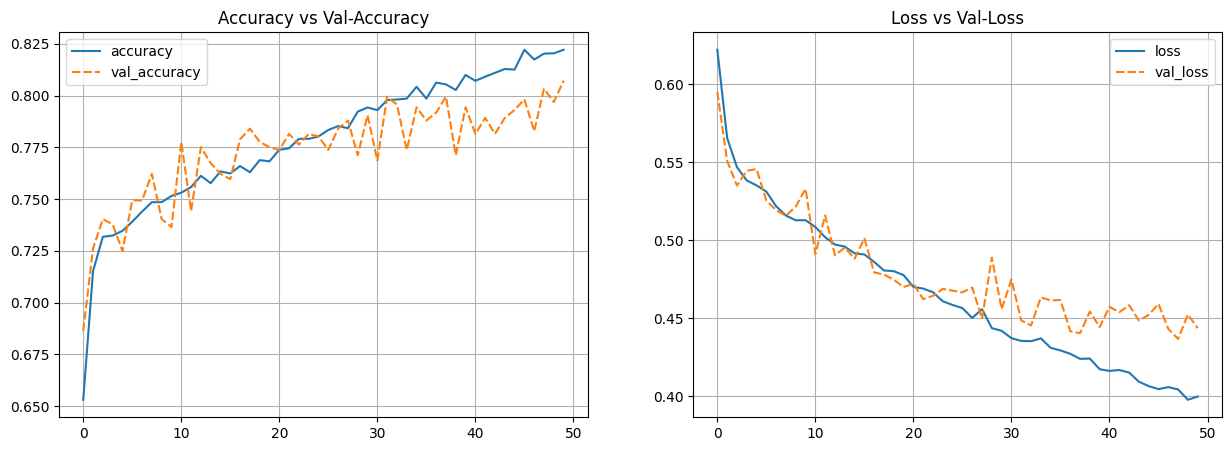

In [47]:
# Plot Training Results
model_lstm_tf_1_hist_df = pd.DataFrame(model_lstm_tf_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_tf_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_tf_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

**Insight :**

Grafik di atas menunjukkan hasil pelatihan yang cukup baik dibandingkan sebelumnya. Akurasi pelatihan meningkat secara konsisten hingga mencapai sekitar 81.98%, sementara akurasi validasi tetap stabil di kisaran 78%-79%, dengan perbedaan yang tidak terlalu besar. Nilai loss pada pelatihan juga menurun secara signifikan, sedangkan loss validasi masih berfluktuasi tetapi tidak menunjukkan peningkatan drastis. Secara keseluruhan, model ini sudah lebih stabil dan lebih baik dalam mempelajari pola data dibandingkan model improvement sebelumnya, meskipun masih ada ruang untuk meningkatkan generalisasi terhadap data validasi.

43/43 [==============================] - 2s 17ms/step
Akurasi Model pada Data Test: 0.7866


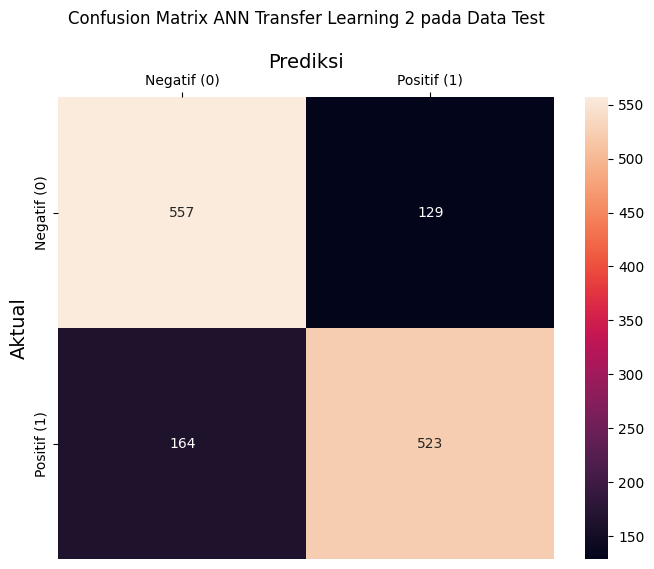

In [48]:
# Prediksi pada data test
y_pred = model_lstm_tf_1.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Akurasi Model pada Data Test: {accuracy:.4f}')

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, fmt='d', annot=True,  ax=ax)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediksi', fontsize=14)
ax.set_xticklabels(['Negatif (0)', 'Positif (1)'])
ax.set_ylabel('Aktual', fontsize=14)
ax.set_yticklabels(['Negatif (0)', 'Positif (1)'])
plt.title('Confusion Matrix ANN Transfer Learning 2 pada Data Test\n')
plt.show()


**Insight :**

Pada hasil diatas akurasi model improvement 2 adalah 78.66%, lebih baik dibandingkan model pertama. Model mampu memprediksi 557 data sebagai True Negatives dan 523 data sebagai True Positives dengan kesalahan yang lebih sedikit, yaitu 129 False Positives dan 164 False Negatives. Akurasi yang lebih tinggi dan jumlah kesalahan yang lebih kecil menunjukkan bahwa model ini memiliki kemampuan yang lebih baik dalam membedakan data positif dan negatif dibandingkan model pre-trained dan model improvement 1.

***Kesimpulan Model Implovement:***

Setelah melakukan improvement model dengan transfer learning menggunakan inisialisasi yang berbeda, yaitu Glorot Uniform dan Orthogonal, diperoleh hasil bahwa model menjadi lebih stabil dibandingkan dengan model pre-trained. Meskipun akurasi model pre-trained lebih tinggi, model transfer learning menunjukkan kemampuan yang lebih baik dalam mengatasi overfitting yang signifikan pada model pre-trained.

Dari kedua model improvement, model improvement 2 dengan inisialisasi Orthogonal terbukti lebih unggul dibandingkan model improvement 1  dengan inisialisasi Glorot Uniform, baik dari segi akurasi maupun stabilitas kinerja pada data validasi. Model dengan inisialisasi Orthogonal tidak hanya memberikan performa yang lebih baik, tetapi juga menunjukkan kemampuan generalisasi yang lebih optimal terhadap data yang belum pernah dilihat sebelumnya. 

Sehingga dapat disimpulkan bahwa model yang akan disimpan dan akan digunakan untuk menganalisis sentimen pengguna aplikasi TIX ID adalah model improvement 2 dengan tranfer learning dan inisialisasi bobot menggunakan Orthogonal.

# **8. Model Saving**

Pada tahap ini, model yang telah dilatih disimpan menggunakan format HDF5 (.h5), sehingga dapat digunakan kembali tanpa perlu pelatihan ulang.

In [51]:
# Simpan model improvement 2
model_lstm_tf_1.save("sentiment_model.h5")

c:\Users\LENOVO\miniconda3\envs\myenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **9. Conclusion**

Setelah melakukan analisis terhadap dataset sentimen ulasan pengguna aplikasi TIX ID, proses analisis mencakup beberapa tahapan penting, mulai dari pembersihan data (data cleaning), transformasi teks menggunakan TextVectorization dan teknik embedding, eksplorasi data untuk memahami pola sentimen pengguna, hingga proses modeling. Hasil model awal kurang optimal karena terjadi overfitting, di mana model menunjukkan performa tinggi pada data pelatihan tetapi kurang mampu menggeneralisasi data baru dengan baik. Oleh karena itu, dilakukan pengembangan model menggunakan Bidirectional LSTM dengan pendekatan transfer learning dari NNLM Google untuk meningkatkan performa klasifikasi sentimen. Selain itu, dilakukan eksperimen dengan dua metode inisialisasi bobot, yaitu Glorot Uniform dan Orthogonal.

Hasil evaluasi menunjukkan bahwa **Model Improvement 2** dengan **Orthogonal Initializer** memiliki performa yang lebih baik dibandingkan dengan Model Improvement 1 dengan inisialisasi Glorot Uniform. Dengan kemampuan generalisasi yang lebih optimal, model improvement 2 lebih stabil terhadap data baru serta mampu mengurangi overfitting yang terjadi pada model improvement 1. Sehingga model yang akan digunakan sebagai model utama untuk menganalisis sentimen pengguna aplikasi TIX ID adalah model improvement 2.

Dengan adanya model tersebut, analisis sentimen dapat memberikan wawasan yang lebih mendalam terkait perasaan dan opini pengguna terhadap fitur, kualitas layanan, serta pengalaman mereka dalam menggunakan aplikasi TIX ID. Hasil analisis ini diharapkan dapat menjadi dasar bagi tim pengembangan dalam mengidentifikasi area yang memerlukan perbaikan serta menyusun strategi untuk meningkatkan pengalaman pengguna secara keseluruhan.


### **Saran Analisis Selanjutnya**

- Tambah data training kemudian gunakan data ulasan terbaru dari Google Play Store, App Store, Instagram, Facbeook, dan media sosial lain untuk memastikan hasil analisis relevan dengan tren terkini

- Optimalkan preprocessing dan model dengan merapkan preprocessing mendalam seperti tokenisasi, penghapusan stopwords, dan normalisasi bahasa. Perbaiki model dengan regularization (dropout, L2) dan optimasi hyperparameter lainnya untuk meningkatkan performa model

- Gunakan Model NLP yang lebih powerfull, coba model berbasis transfer learning seperti NNLM (Neural Network Language Model), USE (Universal Sentence Encoder), atau transformer seperti BERT dan IndoBERT untuk menangkap konteks yang lebih kompleks dalam teks, sehingga menghasilkan analisis yang lebih akurat dan bermakna.